In [38]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [39]:
X_train = pd.read_csv("../data/X_train.csv")
X_test = pd.read_csv("../data/X_test.csv")

#scikit-learn Expects 1D Arrays for Target Variables
y_train = pd.read_csv("../data/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/y_test.csv").values.ravel()

print(X_train.shape, y_train.shape)

(5634, 23) (5634,)


In [40]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5634, 23)
X_test shape: (1409, 23)
y_train shape: (5634,)
y_test shape: (1409,)


In [41]:
#Model 1 — Logistic Regression (Baseline Model)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

In [42]:
print("Logistic Regression Results")
print(classification_report(y_test, log_pred))
print("AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1]))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.80      0.80      1409

AUC: 0.8422485726833553


In [43]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

In [44]:
print("Random Forest Results")
print(classification_report(y_test, rf_pred))
print("AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Random Forest Results
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

AUC: 0.8252731922808648


In [45]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

In [46]:
print("Gradient Boosting Results")
print(classification_report(y_test, gb_pred))
print("AUC:", roc_auc_score(y_test, gb.predict_proba(X_test)[:,1]))

Gradient Boosting Results
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

AUC: 0.8427368312278798


In [47]:
models = ["Logistic Regression", "Random Forest", "Gradient Boosting"]
accuracy = [
    accuracy_score(y_test, log_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, gb_pred),
]

auc = [
    roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1]),
    roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]),
    roc_auc_score(y_test, gb.predict_proba(X_test)[:,1])
]

results = pd.DataFrame({"Model": models, "Accuracy": accuracy, "AUC": auc})
results

,Model,Accuracy,AUC
0,Logistic Regression,0.804826,0.842249
1,Random Forest,0.789922,0.825273
2,Gradient Boosting,0.799148,0.842737


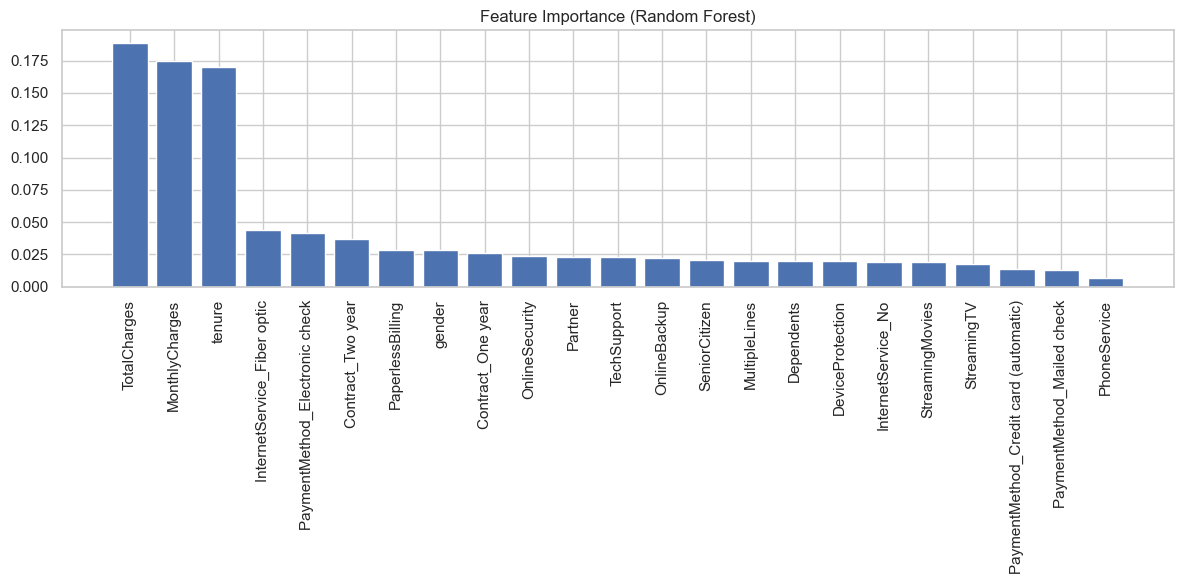

In [48]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [49]:
import pickle

with open("../models/columns.pkl", "wb") as f:
    pickle.dump(list(X_train.columns), f)


In [50]:
import pickle

best_model = rf   # or log_model, rf

with open("../models/churn_model.pkl", "wb") as f:
    pickle.dump(best_model, f)


In [51]:
sample = X_test.iloc[0:1]
prediction = best_model.predict(sample)
probability = best_model.predict_proba(sample)[0][1]

prediction, probability

(array([0]), np.float64(0.0))